In [1]:
# pip install yfinance
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install scikit-learn
# pip install keras


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from datetime import datetime, timedelta


In [3]:
# 1. Load Ethereum data from yfinance
end_date = datetime.now().strftime("%Y-%m-%d")
data = yf.download('ETH-USD', start='2015-01-01', end=end_date)

# Display the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                        ETH-USD     ETH-USD     ETH-USD     ETH-USD   
Date                                                                        
2017-11-09 00:00:00+00:00  320.884003  320.884003  329.451996  307.056000   
2017-11-10 00:00:00+00:00  299.252991  299.252991  324.717987  294.541992   
2017-11-11 00:00:00+00:00  314.681000  314.681000  319.453003  298.191986   
2017-11-12 00:00:00+00:00  307.907990  307.907990  319.153015  298.513000   
2017-11-13 00:00:00+00:00  316.716003  316.716003  328.415009  307.024994   

Price                            Open      Volume  
Ticker                        ETH-USD     ETH-USD  
Date                                               
2017-11-09 00:00:00+00:00  308.644989   893249984  
2017-11-10 00:00:00+00:00  320.670990   885985984  
2017-11-11 00:00:00+00:00  298.585999   842300992  
2017-11-12 00:00:00+00:00  314.690002  1613479936  
2017-11-13 00:00:00

In [4]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2024-11-22 00:00:00+00:00,3331.600830,3331.600830,3428.460449,3262.808838,3360.654297,36775716442
2024-11-23 00:00:00+00:00,3396.223389,3396.223389,3499.370850,3317.654785,3331.645508,38835184688
2024-11-24 00:00:00+00:00,3363.659912,3363.659912,3451.802246,3288.430908,3396.999512,27901454185
2024-11-25 00:00:00+00:00,3413.543945,3413.543945,3545.278809,3304.093994,3364.601562,51544793988
2024-11-26 00:00:00+00:00,3326.517334,3326.517334,3461.292969,3255.542969,3412.950928,39902959158


In [5]:
print(data.columns)

MultiIndex([('Adj Close', 'ETH-USD'),
            (    'Close', 'ETH-USD'),
            (     'High', 'ETH-USD'),
            (      'Low', 'ETH-USD'),
            (     'Open', 'ETH-USD'),
            (   'Volume', 'ETH-USD')],
           names=['Price', 'Ticker'])


In [6]:
# 2. Prepare the data
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data = data[['Close']]  # Keep only 'Close' price
data.dropna(inplace=True)

In [7]:
# 3. Train-test split
train_data = data[:-100]
test_data = data[-100:]

In [8]:
# 4. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [9]:
# 5. Prepare sequences
base_days = 100
x_train, y_train = [], []
for i in range(base_days, len(train_data_scaled)):
    x_train.append(train_data_scaled[i - base_days:i])
    y_train.append(train_data_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
# 6. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 7. Train the model
model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - loss: 0.0550
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0069
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0056
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0053
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0049
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0049
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0045
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0040
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.0047
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0045
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0034
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0035
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0037
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0039
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step 

In [12]:
# 8. Prepare test data
total_data = pd.concat((train_data, test_data), axis=0, ignore_index=True)
test_data_scaled = scaler.transform(total_data)
x_test, y_test = [], []
for i in range(base_days, len(test_data_scaled)):
    x_test.append(test_data_scaled[i - base_days:i])
    y_test.append(test_data_scaled[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
# 9. Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step


In [14]:
# 10. Predict future prices for 5 days
future_prices = {}
current_input = test_data_scaled[-base_days:]  # Start with the last 100 days
for i in range(1, 6):  # Predict for the next 5 days
    future_pred = model.predict(current_input.reshape(1, base_days, 1))
    future_date = (datetime.now() + timedelta(days=i)).strftime('%Y-%m-%d')
    future_prices[future_date] = scaler.inverse_transform(future_pred)[0][0]
    current_input = np.append(current_input[1:], future_pred, axis=0)  # Slide the window


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


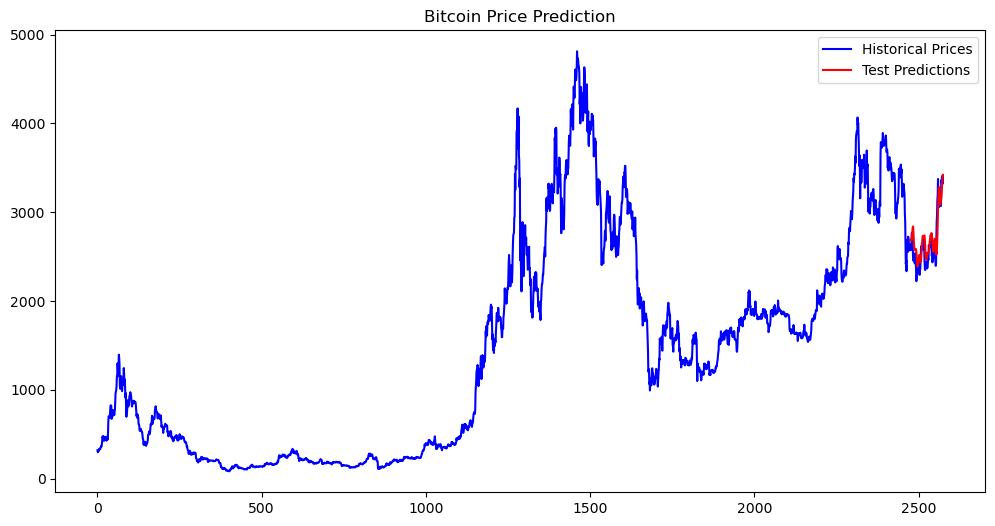

In [15]:
# Adjust predictions to match the last 100 test samples
test_predictions = predictions[-100:]  # Take the last 100 predictions

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Historical Prices", color="blue")
plt.plot(range(len(data) - 100, len(data)), test_predictions, label="Test Predictions", color="red")
plt.title("Bitcoin Price Prediction")
plt.legend()
plt.show()

In [16]:
# 11. Results: Display future prices in a table and save to CSV
future_prices_df = pd.DataFrame(
    list(future_prices.items()), columns=["Date", "PredictedPrice"]
)

# Save the table to a CSV file
future_prices_df.to_csv("ETH_future_predicted_prices.csv", index=False)

# Display the table in the notebook
future_prices_df


,Date,PredictedPrice
0,2024-11-29,3412.646240
1,2024-11-30,3402.410889
2,2024-12-01,3396.075928
3,2024-12-02,3395.048584
4,2024-12-03,3398.588379
